# Homework 9

## Problem 11 - SVM

We have to use geometry to find the separating plane in the two-dimensional Z-space.

In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.style as style
style.use('bmh')

In [2]:
# Write down data
data = [[1, 0, -1],
        [0, 1, -1],
        [0, -1, -1],
        [-1, 0, 1],
        [0, 2, 1],
        [0, -2, 1],
        [-2, 0, 1]]

df = pd.DataFrame(data, columns = ['x1', 'x2', 'y'], dtype=np.float64)
print(df)

    x1   x2    y
0  1.0  0.0 -1.0
1  0.0  1.0 -1.0
2  0.0 -1.0 -1.0
3 -1.0  0.0  1.0
4  0.0  2.0  1.0
5  0.0 -2.0  1.0
6 -2.0  0.0  1.0


points in transformed Z-space:
[[-3.  2.]
 [ 0. -1.]
 [ 0.  3.]
 [ 1.  2.]
 [ 3. -3.]
 [ 3.  5.]
 [ 3.  5.]]


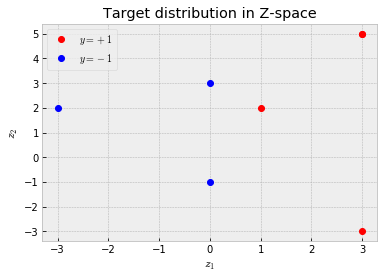

In [3]:
# transform to Z-space

x1 = df['x1']
x2 = df['x2']
y = df['y']
N = x1.shape[0]

z1 = x2*x2 - 2*x1 - 1
z2 = x1*x1 - 2*x2 + 1
N = z1.shape[0]
Z = np.c_[z1, z2]
print("points in transformed Z-space:")
print(Z)



# Target distribution: points (z1, z2, y)
plt.plot(z1[y==1], z2[y==1], 'ro', label='$y=+1$')
plt.plot(z1[y==-1], z2[y==-1], 'bo', label='$y=-1$')
plt.title("Target distribution in Z-space")
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.legend()
plt.show()



We can see from the plot above that the separating plane is a vertical line at $z_1 = 0.5$. The normal vector is $\mathbf{n} = (1,0)$. In order to find $b$ in the equation $\mathbf{w}^T \mathbf{z} + b = 0$ we can pick a point on the separating plane, e.g. $\mathbf{p} = (0.5, 0)$. The separating plane must satisfy the equation

$\mathbf{w}^T \mathbf{p} + b = 0$

Let's plug in $\mathbf{p} = (0.5, 0)$, and let's try $\mathbf{w} = (1,0)$:

$\mathbf{w}^T \mathbf{p} + b = 0$

$\Rightarrow 0.5 + b = 0$

$\Rightarrow b = -0.5$

So the answer is **11[c]**.

We can see that there are three support vectors, namely $(0,-1), (0,3)$ and $(1,2)$ in the $Z$-space.

# Problem 12 - Hard margin SVM

We apply the hard-margin (meaning $C = \infty$) SVM algorithm with the kernel $K(x, x') = (1 + x^T x')^2$. We have to compute the number of support vectors.

## 12.1 Setting up the classifier

For the **Support Vector Machine** we will use the [SVM class from scikit learn](http://scikit-learn.org/stable/modules/svm.html) (which internally uses `libsvm`).

In [4]:
# classifier clf with the parameters as stated by the homework problem
clf = svm.SVC(C = np.inf, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
clf.fit(Z, y)
print(Z.shape)
print(y.shape)

print("number of support vectors: ", sum(clf.n_support_))

(7, 2)
(7,)
number of support vectors:  5


## Result for problem 12

The number of support vectors is 5, so the correct answer is **12[c]**.